In [195]:
import pandas as pd
import pickle
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import re
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split, KFold
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [13]:
MVP_frame = pd.read_pickle("data/apt_frame_final.pickle")
MVP_frame

,address,zip code,unit,rent($),rooms,beds,baths,studio,Balcony,Bike Room,...,Sublet,Sublets Allowed,Swimming Pool,Terrace,Valet Parking,Virtual Doorman,Washer / Dryer in Unit,Water View,Waterfront,Wheelchair Access
0,574 11th Street,11215,#2,6950,6.0,3.0,2.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3900 Kings Highway,11234,#APT6M,2075,3.0,2.0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,161 Engert Avenue,11222,#1L,2600,4.0,2.0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1326 Ocean Avenue,11230,#2/G,2300,3.0,2.0,1.0,0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,223 9th Street,11215,#3/FLR,2395,5.0,2.0,2.0,0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3562,224 Eckford Street,11222,#3,4800,6.0,4.0,2.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3563,222 Stanhope Street,11237,#3LA,2625,6.0,4.0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3564,178 Ocean Parkway,11218,#A57,1575,3.0,0.0,1.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3565,345 Eldert Street,11237,#EE120,2720,2.0,1.0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
MVP_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3372 entries, 0 to 3566
Data columns (total 69 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   address                          3372 non-null   object 
 1   zip code                         3372 non-null   int64  
 2   unit                             3372 non-null   object 
 3   rent($)                          3372 non-null   int64  
 4   rooms                            3372 non-null   float64
 5   beds                             3372 non-null   float64
 6   baths                            3372 non-null   float64
 7   studio                           3372 non-null   int64  
 8   Balcony                          3372 non-null   float64
 9   Bike Room                        3372 non-null   float64
 10  Board Approval Required          3372 non-null   float64
 11  Cats Only - No Dogs              3372 non-null   float64
 12  Cats and Dogs Allowe

In [97]:
MVP_frame.describe()

,zip code,rent($),rooms,beds,baths,studio,Balcony,Bike Room,Board Approval Required,Cats Only - No Dogs,...,Sublet,Sublets Allowed,Swimming Pool,Terrace,Valet Parking,Virtual Doorman,Washer / Dryer in Unit,Water View,Waterfront,Wheelchair Access
count,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000,...,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000
mean,11083.841637,2349.055753,3.853499,1.835113,1.189947,0.092527,0.146797,0.276987,0.000890,0.002966,...,0.000593,0.001186,0.029953,0.078292,0.018090,0.171412,0.245552,0.030842,0.011269,0.060498
std,1230.052449,1347.999271,1.689448,1.113857,0.488549,0.289811,0.353956,0.447576,0.029819,0.054385,...,0.024350,0.034427,0.170482,0.268670,0.133297,0.376924,0.430478,0.172916,0.105573,0.238443
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11211.000000,1875.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11220.000000,2350.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11226.000000,2850.000000,5.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11385.000000,18320.000000,40.000000,6.000000,4.500000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
df = MVP_frame[(MVP_frame[["rent($)"]] > 0).all(axis=1)]
df.describe()

,zip code,rent($),rooms,beds,baths,studio,Balcony,Bike Room,Board Approval Required,Cats Only - No Dogs,...,Sublet,Sublets Allowed,Swimming Pool,Terrace,Valet Parking,Virtual Doorman,Washer / Dryer in Unit,Water View,Waterfront,Wheelchair Access
count,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,...,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000
mean,11068.934211,2672.545209,3.875506,1.846491,1.191464,0.088394,0.147099,0.277328,0.000675,0.003036,...,0.000675,0.001350,0.029690,0.078610,0.015520,0.173752,0.245951,0.032389,0.010459,0.063428
std,1295.031738,1096.429790,1.702776,1.108241,0.491608,0.283915,0.354264,0.447755,0.025972,0.055029,...,0.025972,0.036717,0.169758,0.269174,0.123628,0.378960,0.430723,0.177060,0.101749,0.243772
min,-1.000000,850.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11211.000000,2099.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11220.000000,2449.500000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11228.000000,2995.000000,5.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11385.000000,18320.000000,40.000000,6.000000,4.500000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
df = df[(df[["rooms", "beds", "baths"]] != -1).all(axis=1)]
df.describe()

,zip code,rent($),rooms,beds,baths,studio,Balcony,Bike Room,Board Approval Required,Cats Only - No Dogs,...,Sublet,Sublets Allowed,Swimming Pool,Terrace,Valet Parking,Virtual Doorman,Washer / Dryer in Unit,Water View,Waterfront,Wheelchair Access
count,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,...,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.00000,2943.000000,2943.000000
mean,11071.667686,2677.748896,3.891947,1.866803,1.207102,0.089025,0.147808,0.278287,0.000680,0.003058,...,0.000680,0.001359,0.029562,0.078831,0.015630,0.174652,0.246687,0.03262,0.010533,0.063880
std,1283.456842,1097.786924,1.694920,1.085688,0.457033,0.284828,0.354970,0.448232,0.026064,0.055225,...,0.026064,0.036848,0.169403,0.269521,0.124061,0.379733,0.431156,0.17767,0.102108,0.244581
min,-1.000000,850.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,11211.000000,2100.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,11220.000000,2450.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,11228.000000,2995.000000,5.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,11385.000000,18320.000000,40.000000,6.000000,4.500000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [109]:
df.corr()

,zip code,rent($),rooms,beds,baths,studio,Balcony,Bike Room,Board Approval Required,Cats Only - No Dogs,...,Sublet,Sublets Allowed,Swimming Pool,Terrace,Valet Parking,Virtual Doorman,Washer / Dryer in Unit,Water View,Waterfront,Wheelchair Access
zip code,1.000000,-0.072795,0.098093,0.109299,0.026604,-0.109644,0.039540,-0.086942,0.002953,0.005956,...,0.003167,-0.076520,-0.295071,-0.021919,0.015003,0.030267,-0.133848,-0.096351,0.013057,-0.005837
rent($),-0.072795,1.000000,0.301684,0.341057,0.466474,-0.128334,0.107552,0.200601,0.020130,-0.020698,...,0.014190,-0.028250,0.164485,0.159466,0.067988,0.047332,0.353892,0.210745,0.067533,0.071401
rooms,0.098093,0.301684,1.000000,0.730114,0.477565,-0.423641,0.018080,-0.127738,-0.021420,-0.025520,...,-0.021420,-0.030302,-0.134481,0.056600,-0.084105,0.049928,-0.002118,-0.021025,-0.048414,-0.089117
beds,0.109299,0.341057,0.730114,1.000000,0.450529,-0.537613,0.018470,-0.145919,-0.020824,-0.038557,...,-0.020824,-0.054949,-0.161548,0.025441,-0.100622,0.068813,-0.036524,-0.046191,-0.073192,-0.113872
baths,0.026604,0.466474,0.477565,0.450529,1.000000,-0.140376,0.072096,0.034651,-0.011819,-0.025102,...,-0.011819,-0.016720,-0.008859,0.099208,0.008832,0.073543,0.177056,0.036076,0.037000,-0.004364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virtual Doorman,0.030267,0.047332,0.049928,0.068813,0.073543,-0.046382,0.161453,0.205611,-0.011996,-0.025478,...,-0.011996,-0.016971,-0.059152,0.041450,0.014185,1.000000,0.041943,0.021328,0.031434,0.084781
Washer / Dryer in Unit,-0.133848,0.353892,-0.002118,-0.036524,0.177056,0.072982,0.099255,0.202199,0.015324,-0.031694,...,-0.014923,-0.021111,0.258459,0.101699,0.182074,0.041943,1.000000,0.125653,0.157139,0.105153
Water View,-0.096351,0.210745,-0.021025,-0.046191,0.036076,0.063498,0.128327,0.171941,-0.004789,-0.010170,...,-0.004789,-0.006774,0.250284,0.159230,0.177332,0.021328,0.125653,1.000000,0.280835,0.131938
Waterfront,0.013057,0.067533,-0.048414,-0.073192,0.037000,0.084619,0.013297,0.166158,-0.002691,-0.005714,...,-0.002691,-0.003806,0.316052,-0.017832,0.335821,0.031434,0.157139,0.280835,1.000000,0.163594


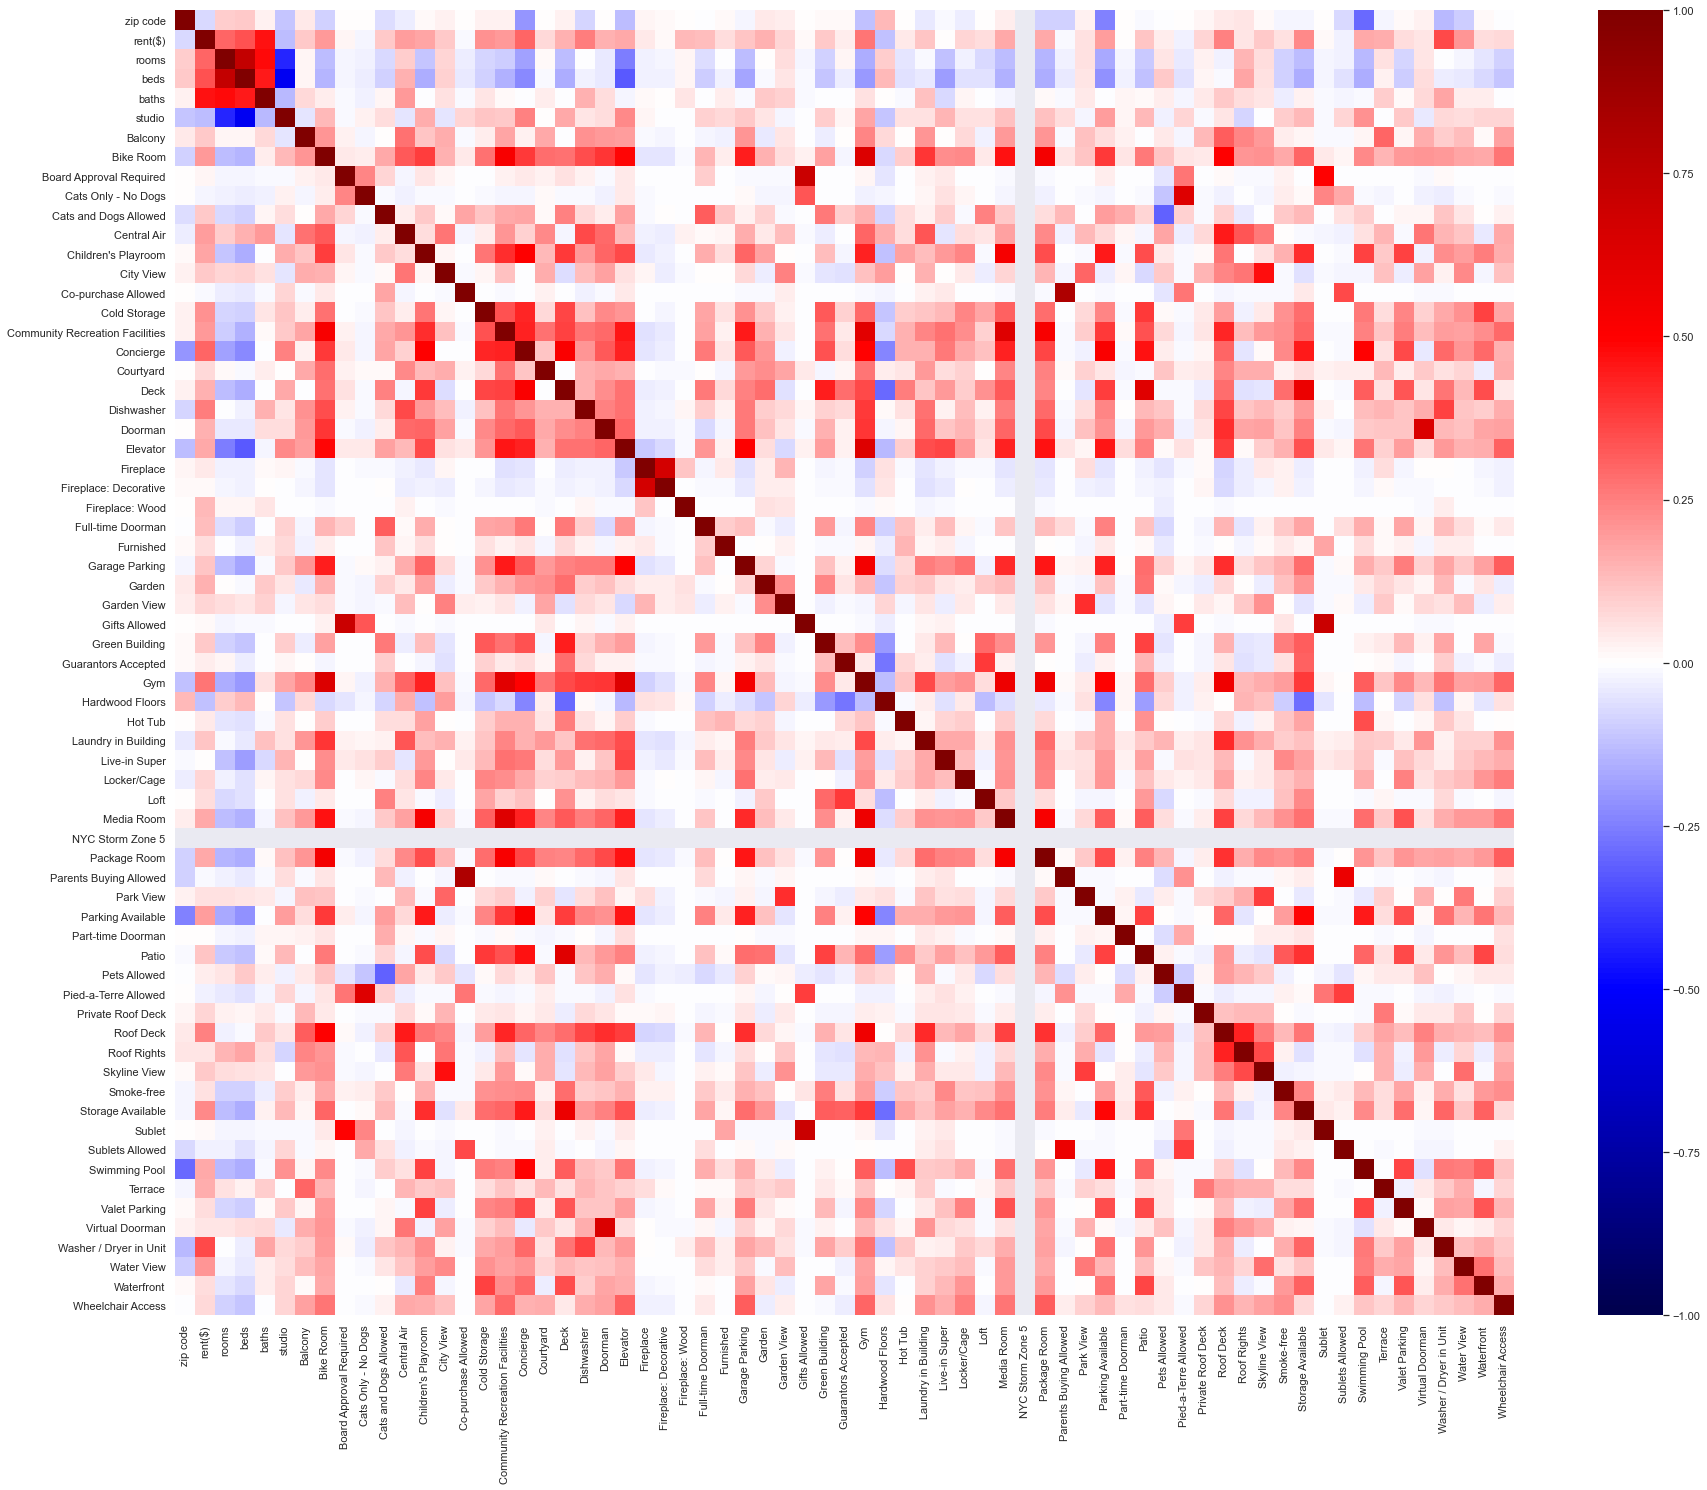

In [110]:
plt.figure(figsize = (30, 24))
sns.heatmap(df.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);

Overall as expected; pretty strong correlation between number of rooms and rent, negatively so if there's a studio, and ZIP code is a pretty weak correlation.

One issue is the high multicolinearity of rooms and beds. May want to remove rooms for the final model.

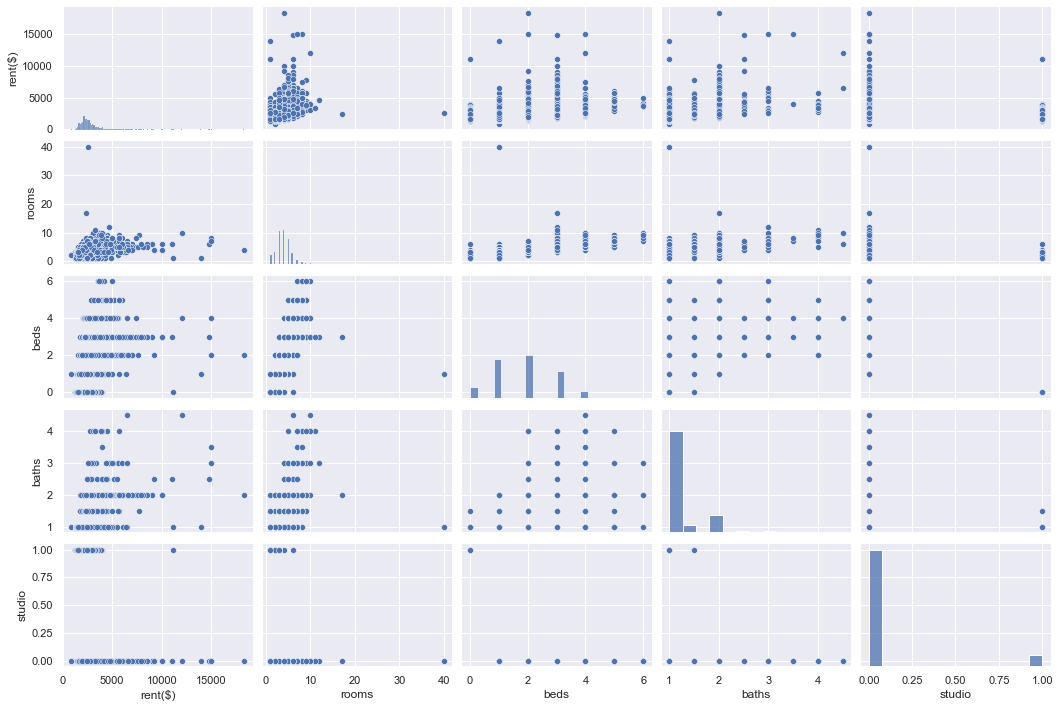

In [115]:
sns.pairplot(df[["rent($)", "rooms", "beds", "baths", "studio"]], height=2.0, aspect=1.5);

In [167]:
features, target = ["rooms", "beds", "baths"], "rent($)"
X, y = df[features], df[target]
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.23916885396482168

In [168]:
lm1 = sm.OLS(y, X)
o1 = lm1.fit()
o1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                rent($)   R-squared (uncentered):                   0.871
Model:                            OLS   Adj. R-squared (uncentered):              0.871
Method:                 Least Squares   F-statistic:                              6622.
Date:                Tue, 11 May 2021   Prob (F-statistic):                        0.00
Time:                        12:25:18   Log-Likelihood:                         -24618.
No. Observations:                2943   AIC:                                  4.924e+04
Df Residuals:                    2940   BIC:                                  4.926e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rooms        114.1083     16.043      7.113      0.000      82.652     145.564
beds         131.4933     26.136      5.031      0.000      80.247     182.739
baths       1538.0889     39.534     38.905      0.000    1460.571    1615.607
==============================================================================
Omnibus:                     2001.192   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           110666.903
Skew:                           2.583   Prob(JB):                         0.00
Kurtosis:                      32.594   Cond. No.                         10.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
features, target = ["rooms", "beds", "baths", "studio"], "rent($)"
X, y = df[features], df[target]
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.23946875149504843

In [171]:
lm2 = sm.OLS(y, X)
o2 = lm2.fit()
o2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                rent($)   R-squared (uncentered):                   0.875
Model:                            OLS   Adj. R-squared (uncentered):              0.875
Method:                 Least Squares   F-statistic:                              5130.
Date:                Tue, 11 May 2021   Prob (F-statistic):                        0.00
Time:                        12:25:59   Log-Likelihood:                         -24576.
No. Observations:                2943   AIC:                                  4.916e+04
Df Residuals:                    2939   BIC:                                  4.918e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rooms        106.5453     15.839      6.727      0.000      75.489     137.602
beds         231.5414     27.953      8.283      0.000     176.732     286.351
baths       1376.0130     42.748     32.189      0.000    1292.194    1459.832
studio       678.5330     73.470      9.236      0.000     534.475     822.591
==============================================================================
Omnibus:                     2193.272   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           130221.207
Skew:                           2.965   Prob(JB):                         0.00
Kurtosis:                      35.043   Cond. No.                         19.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
df.iloc[:, 4:]

,rooms,beds,baths,studio,Balcony,Bike Room,Board Approval Required,Cats Only - No Dogs,Cats and Dogs Allowed,Central Air,...,Sublet,Sublets Allowed,Swimming Pool,Terrace,Valet Parking,Virtual Doorman,Washer / Dryer in Unit,Water View,Waterfront,Wheelchair Access
0,6.0,3.0,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3.0,2.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,2.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,2.0,1.0,0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,2.0,2.0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3562,6.0,4.0,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3563,6.0,4.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3564,3.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3565,2.0,1.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
features, target = df.iloc[:, 4:], "rent($)"
X, y = features, df[target]
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.5040356323282484

In [214]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)

lr_test = LinearRegression()

scores = cross_val_score(lr_test, X, y, cv = kfold)
print(scores)

[0.44410573 0.47287143 0.4436641  0.32974336 0.40803675]


In [173]:
lm3 = sm.OLS(y, X)
o3 = lm3.fit()
o3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                rent($)   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.920
Method:                 Least Squares   F-statistic:                              528.3
Date:                Tue, 11 May 2021   Prob (F-statistic):                        0.00
Time:                        12:26:43   Log-Likelihood:                         -23888.
No. Observations:                2943   AIC:                                  4.790e+04
Df Residuals:                    2879   BIC:                                  4.829e+04
Df Model:                          64                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
rooms                              79.7442     13.356      5.971      0.000      53.556     105.933
beds                              323.0721     23.516     13.739      0.000     276.963     369.182
baths                             804.1689     39.033     20.602      0.000     727.633     880.704
studio                            125.6249     63.657      1.973      0.049       0.806     250.444
Balcony                            38.1170     49.142      0.776      0.438     -58.240     134.474
Bike Room                          19.5955     50.197      0.390      0.696     -78.831     118.022
Board Approval Required            55.0575    848.509      0.065      0.948   -1608.689    1718.804
Cats Only - No Dogs               477.9269    371.031      1.288      0.198    -249.587    1205.441
Cats and Dogs Allowed             358.3254    129.758      2.761      0.006     103.897     612.754
Central Air                      -135.8935     40.273     -3.374      0.001    -214.861     -56.926
Children's Playroom              -122.7650     95.160     -1.290      0.197    -309.354      63.824
City View                          58.4865     43.631      1.340      0.180     -27.065     144.038
Co-purchase Allowed               -16.6745   1124.208     -0.015      0.988   -2221.008    2187.659
Cold Storage                      491.9451     96.878      5.078      0.000     301.988     681.902
Community Recreation Facilities    66.8414     71.393      0.936      0.349     -73.145     206.828
Concierge                         906.4902     90.124     10.058      0.000     729.777    1083.203
Courtyard                        -118.9018     47.174     -2.520      0.012    -211.400     -26.403
Deck                             -287.8975    121.639     -2.367      0.018    -526.406     -49.389
Dishwasher                        140.6092     36.773      3.824      0.000      68.504     212.714
Doorman                          -118.8325     60.220     -1.973      0.049    -236.911      -0.754
Elevator                          281.5273     50.268      5.600      0.000     182.962     380.093
Fireplace                         500.2720    130.012      3.848      0.000     245.347     755.197
Fireplace: Decorative             -51.6536    186.667     -0.277      0.782    -417.669     314.361
Fireplace: Wood                  6261.5684    833.849      7.509      0.000    4626.568    7896.569
Full-time Doorman                 116.0934    141.623      0.820      0.412    -161.598     393.785
Furnished                         474.7871    220.791      2.150      0.032      41.863     907.711
Garage Parking                   -142.3745     59.986     -2.373      0.018    -259.

In [190]:
#df.columns[4:]
coefs = dict(zip(df.columns[4:], lr.coef_))
sorted_coefs = {}
sorted_keys = sorted(coefs, key = coefs.get, reverse = True)
for i in sorted_keys:
    sorted_coefs[i] = coefs[i]
for c in sorted_coefs:
    print(c, sorted_coefs[c])

Fireplace: Wood 6440.01672216205
Gifts Allowed 1379.7417280152852
Concierge 881.254528555372
Water View 792.5042523211034
baths 590.5219992520559
Furnished 522.4032380206479
Cold Storage 489.1039859179195
Storage Available 470.16464423680924
Washer / Dryer in Unit 433.8515139914772
Fireplace 426.71491305715404
Loft 363.86845585602396
beds 299.3506244483515
Swimming Pool 251.21857573108514
Roof Deck 236.40572695390324
Garden 221.22042625876338
Cats Only - No Dogs 193.59191078776666
Elevator 182.54605884796817
Co-purchase Allowed 171.28298485186187
Private Roof Deck 161.487800792259
Gym 160.11369154159627
Terrace 159.66140948084205
Cats and Dogs Allowed 147.50236786390872
Full-time Doorman 147.4710605511127
Community Recreation Facilities 117.12827099561247
Dishwasher 103.72330988072747
Wheelchair Access 86.04215606192145
Parents Buying Allowed 71.48836369908923
City View 69.8907124025838
Locker/Cage 53.207266918330305
Media Room 43.41234441175345
Virtual Doorman 37.11471147091163
Sublet

In [118]:
train_pred = lr.predict(X)
print(train_pred)

[3609.94862088 2511.99698451 2503.64891984 ... 2163.03160403 2345.86235894
 2354.21042361]


In [119]:
print(sqrt(mean_squared_error(y, train_pred)))

957.3889223282877


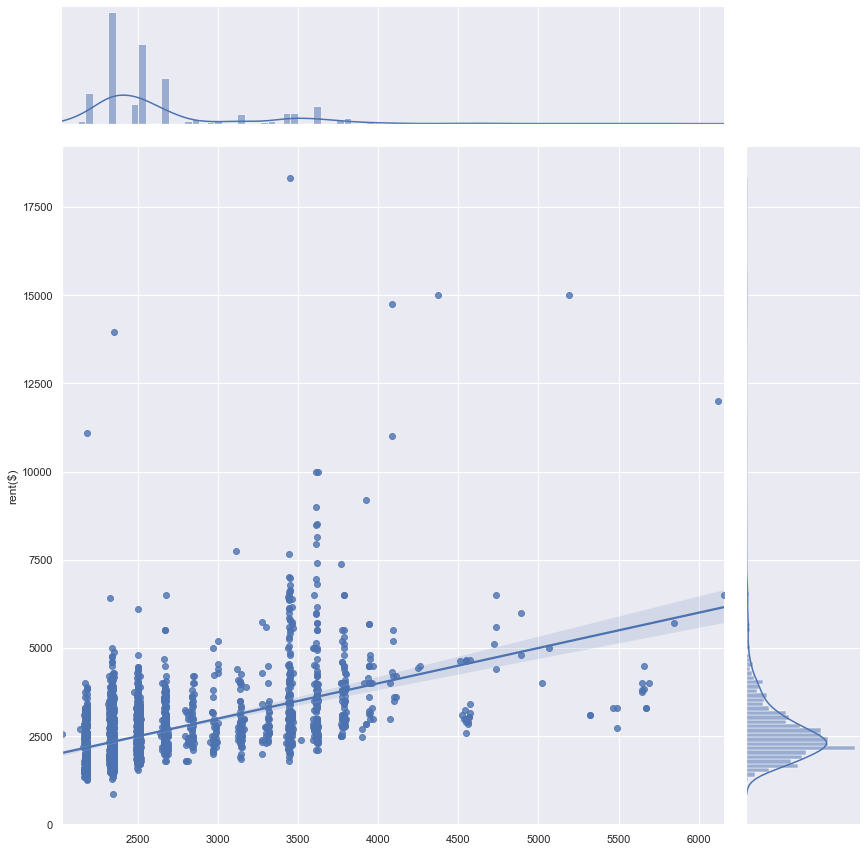

In [120]:
sns.jointplot(x=train_pred,y=y, kind='reg', height = 12)

In [194]:
lss = Lasso()


In [132]:
print(len(df["rent($)"].unique()))
print(np.sort(df["rent($)"].unique()))

562
[  850  1250  1275  1300  1340  1349  1350  1375  1399  1400  1425  1449
  1450  1473  1475  1485  1495  1499  1500  1515  1519  1522  1525  1549
  1550  1560  1571  1574  1575  1581  1595  1599  1600  1615  1625  1646
  1649  1650  1670  1675  1685  1693  1695  1698  1699  1700  1720  1721
  1725  1741  1743  1750  1760  1764  1775  1787  1790  1795  1798  1799
  1800  1820  1825  1833  1835  1848  1849  1850  1854  1860  1867  1870
  1872  1875  1885  1895  1897  1899  1900  1905  1908  1922  1928  1939
  1945  1949  1950  1960  1965  1975  1980  1989  1990  1995  1999  2000
  2001  2016  2020  2025  2045  2048  2050  2055  2060  2062  2075  2076
  2083  2089  2095  2096  2099  2100  2105  2109  2110  2115  2121  2130
  2131  2137  2138  2139  2149  2150  2154  2155  2156  2157  2165  2169
  2172  2175  2176  2177  2180  2185  2187  2192  2195  2199  2200  2203
  2208  2215  2225  2227  2229  2235  2240  2245  2249  2250  2266  2267
  2273  2275  2283  2290  2291  2292  2295  229

In [192]:
common_rent_values = df["rent($)"].value_counts().head(20)
common_rent_values

2200    112
2500    108
2100     85
2400     83
2300     82
2250     74
2000     71
2600     64
2800     57
2700     53
3000     53
2350     50
1900     47
1700     45
1800     44
2750     41
1850     38
2900     36
1750     34
2150     33
Name: rent($), dtype: int64

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Rent ($)')

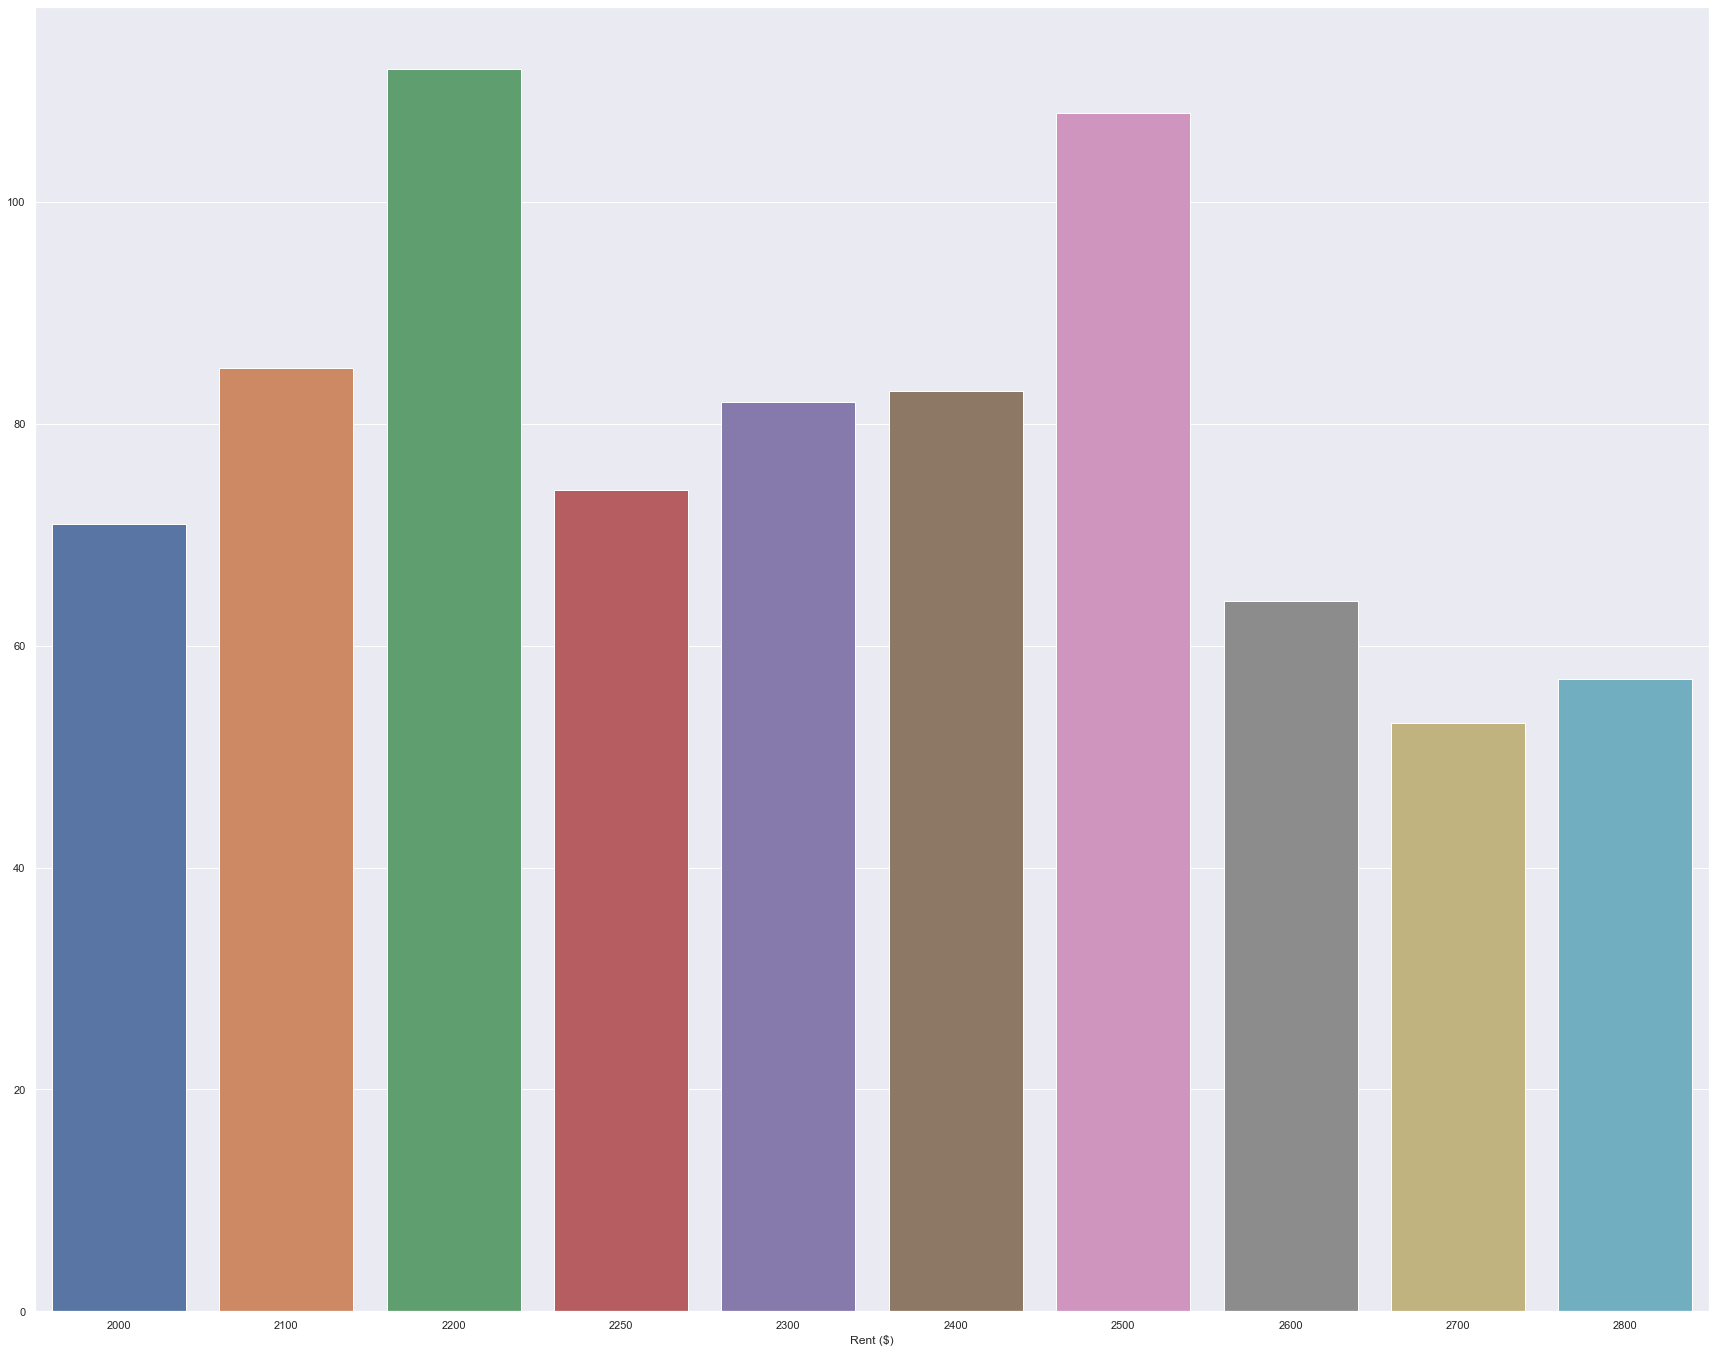

In [164]:
plt.figure(figsize = (30, 24))
rent_chart = sns.barplot(common_rent_values.index, common_rent_values.values, x = "Frequency", y = "Rent($)" )
rent_chart.set_xlabel("Rent ($)")

In [ ]:
#def split_and_validate(X, y):

In [198]:
df.describe()

,zip code,rent($),rooms,beds,baths,studio,Balcony,Bike Room,Board Approval Required,Cats Only - No Dogs,...,Sublet,Sublets Allowed,Swimming Pool,Terrace,Valet Parking,Virtual Doorman,Washer / Dryer in Unit,Water View,Waterfront,Wheelchair Access
count,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,...,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.00000,2943.000000,2943.000000
mean,11071.667686,2677.748896,3.891947,1.866803,1.207102,0.089025,0.147808,0.278287,0.000680,0.003058,...,0.000680,0.001359,0.029562,0.078831,0.015630,0.174652,0.246687,0.03262,0.010533,0.063880
std,1283.456842,1097.786924,1.694920,1.085688,0.457033,0.284828,0.354970,0.448232,0.026064,0.055225,...,0.026064,0.036848,0.169403,0.269521,0.124061,0.379733,0.431156,0.17767,0.102108,0.244581
min,-1.000000,850.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,11211.000000,2100.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,11220.000000,2450.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,11228.000000,2995.000000,5.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,11385.000000,18320.000000,40.000000,6.000000,4.500000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [197]:
amenities = df.iloc[:, 8:]
amenities.head()

,Balcony,Bike Room,Board Approval Required,Cats Only - No Dogs,Cats and Dogs Allowed,Central Air,Children's Playroom,City View,Co-purchase Allowed,Cold Storage,...,Sublet,Sublets Allowed,Swimming Pool,Terrace,Valet Parking,Virtual Doorman,Washer / Dryer in Unit,Water View,Waterfront,Wheelchair Access
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [199]:
amenities.sum(axis = 0).sort_values(ascending = True).head(50)

NYC Storm Zone 5                     0.0
Gifts Allowed                        1.0
Fireplace: Wood                      1.0
Board Approval Required              2.0
Co-purchase Allowed                  2.0
Sublet                               2.0
Parents Buying Allowed               3.0
Sublets Allowed                      4.0
Part-time Doorman                    5.0
Pied-a-Terre Allowed                 7.0
Cats Only - No Dogs                  9.0
Hot Tub                             11.0
Loft                                12.0
Furnished                           16.0
Waterfront                          31.0
Fireplace: Decorative               37.0
Green Building                      45.0
Valet Parking                       46.0
Full-time Doorman                   51.0
Guarantors Accepted                 55.0
Cats and Dogs Allowed               65.0
Private Roof Deck                   75.0
Fireplace                           81.0
Swimming Pool                       87.0
Patio           

In [200]:
amenities.shape

(2943, 61)

In [209]:
lasso_model = Lasso(alpha = 0.2)
lasso_model.fit(X, y)
lasso_model.score(X, y)

0.5036948972684643

In [234]:
df[(df[["rent($)"]] > 7500).all(axis=1)]

,address,zip code,unit,rent($),rooms,beds,baths,studio,Balcony,Bike Room,...,Sublets Allowed,Swimming Pool,Terrace,Valet Parking,Virtual Doorman,Washer / Dryer in Unit,Water View,Waterfront,Wheelchair Access,total amenities
531,614 3rd Street,11215,#2,7750,9.0,3.0,1.5,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0
1255,79 Willow Street,11201,#1505,13945,1.0,1.0,1.0,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,19.0
1284,One Brooklyn Bridge Park 360 Furman Street,11201,#410,8995,6.0,3.0,2.0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0
1389,27 Eighth Avenue,11217,Avenue,12000,10.0,4.0,4.5,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,12.0
1441,One Clinton 1 Clinton Street,11201,#24A,14750,6.0,3.0,2.5,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0
1488,460 Bergen Street,11217,#2,8495,6.0,3.0,2.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,12.0
1774,834 Pacific Street,11238,#110,10000,4.0,3.0,2.0,0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,18.0
2052,The Clock Tower 1 Main Street,11201,#4J,9200,4.0,2.0,2.5,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,18.0
2231,1 John Street,11201,#10D,15000,8.0,4.0,3.5,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,17.0
2288,181 Front Street 181 Front Street,11201,9B---TERRACE,9985,6.0,3.0,2.0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0


In [224]:
df.iloc[:, 8:].sum(axis = 1).sort_values()

2306     1.0
1422     1.0
620      1.0
1220     1.0
1659     1.0
        ... 
1277    29.0
438     30.0
2359    30.0
1561    30.0
581     30.0
Length: 2943, dtype: float64

In [225]:
df_test = df
df_test["total amenities"] = df.iloc[:, 8:].sum(axis = 1)
df_test

,address,zip code,unit,rent($),rooms,beds,baths,studio,Balcony,Bike Room,...,Sublets Allowed,Swimming Pool,Terrace,Valet Parking,Virtual Doorman,Washer / Dryer in Unit,Water View,Waterfront,Wheelchair Access,total amenities
0,574 11th Street,11215,#2,6950,6.0,3.0,2.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
1,3900 Kings Highway,11234,#APT6M,2075,3.0,2.0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2,161 Engert Avenue,11222,#1L,2600,4.0,2.0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,1326 Ocean Avenue,11230,#2/G,2300,3.0,2.0,1.0,0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
4,223 9th Street,11215,#3/FLR,2395,5.0,2.0,2.0,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3562,224 Eckford Street,11222,#3,4800,6.0,4.0,2.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0
3563,222 Stanhope Street,11237,#3LA,2625,6.0,4.0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
3564,178 Ocean Parkway,11218,#A57,1575,3.0,0.0,1.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3565,345 Eldert Street,11237,#EE120,2720,2.0,1.0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


In [226]:
features, target = ["rooms", "beds", "baths", "studio", "total amenities"], "rent($)"
X, y = df_test[features], df_test[target]
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.33856114858673236